<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><span><a href="#Dataset" data-toc-modified-id="Dataset-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Dataset</a></span></li><li><span><a href="#Import-libraries" data-toc-modified-id="Import-libraries-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Import libraries</a></span></li></ul></li><li><span><a href="#Read-and-explore-data" data-toc-modified-id="Read-and-explore-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Read and explore data</a></span></li><li><span><a href="#Data-pre-processing" data-toc-modified-id="Data-pre-processing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data pre-processing</a></span><ul class="toc-item"><li><span><a href="#Rename-columns" data-toc-modified-id="Rename-columns-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Rename columns</a></span></li><li><span><a href="#Handle-missing-values" data-toc-modified-id="Handle-missing-values-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Handle missing values</a></span></li><li><span><a href="#Replace-outliers" data-toc-modified-id="Replace-outliers-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Replace outliers</a></span></li><li><span><a href="#Split-the-dataset-into-train-and-test-data" data-toc-modified-id="Split-the-dataset-into-train-and-test-data-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Split the dataset into train and test data</a></span></li><li><span><a href="#Split-the-target-variable-and-dependent-variables" data-toc-modified-id="Split-the-target-variable-and-dependent-variables-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Split the target variable and dependent variables</a></span></li><li><span><a href="#Data-transformation" data-toc-modified-id="Data-transformation-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Data transformation</a></span></li><li><span><a href="#Create-a-3D-Input-Dataset" data-toc-modified-id="Create-a-3D-Input-Dataset-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Create a 3D Input Dataset</a></span></li></ul></li><li><span><a href="#Create-BiLSTM,-LSTM-and-GRU-model" data-toc-modified-id="Create-BiLSTM,-LSTM-and-GRU-model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Create BiLSTM, LSTM and GRU model</a></span><ul class="toc-item"><li><span><a href="#Fit-the-models" data-toc-modified-id="Fit-the-models-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Fit the models</a></span><ul class="toc-item"><li><span><a href="#Plot-train-loss-vs-validation-loss" data-toc-modified-id="Plot-train-loss-vs-validation-loss-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Plot train loss vs validation loss</a></span></li></ul></li><li><span><a href="#Inverse-target-variable-for-train-and-test-data" data-toc-modified-id="Inverse-target-variable-for-train-and-test-data-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Inverse target variable for train and test data</a></span></li></ul></li><li><span><a href="#Make-prediction-using-BiLSTM,-LSTM-and-GRU" data-toc-modified-id="Make-prediction-using-BiLSTM,-LSTM-and-GRU-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Make prediction using BiLSTM, LSTM and GRU</a></span><ul class="toc-item"><li><span><a href="#Plot-true-future-vs-prediction" data-toc-modified-id="Plot-true-future-vs-prediction-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Plot true future vs prediction</a></span></li><li><span><a href="#Calculate-RMSE-and-MAE" data-toc-modified-id="Calculate-RMSE-and-MAE-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Calculate RMSE and MAE</a></span></li></ul></li><li><span><a href="#Forecast-water-consumption-in-10-years" data-toc-modified-id="Forecast-water-consumption-in-10-years-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Forecast water consumption in 10 years</a></span></li></ul></div>

# Introduction
In this notebook, I compare three commonly used Recurrent Neural Network; Long Short-Term Memory (LSTM), Gated Recurrent Unit (GRU) and Bidirectional LSTM (BiLSTM) based on their performance on predicting water consumption under the impact of climate change. Then, I use the best model to forecast urban water consumption for the next 10 years. 

## Dataset
The city of Brossard, Quebec, Canada, is chosen as a study site. The city is a part of the metropolitan area of Montreal on the south shore of the Saint Lawrence River.

For this project, **Daily water consumption** data are obtained from 2011-09-01 to 2015-09-30. For the same period, **minimum temperature**, **maximum temperature** and **total precipitation** are collected. Measurements of these climatic variables were made from [Environment Canada](https://www.concordia.ca/news/stories/2019/01/07/historical-canadian-climate-data-is-now-only-a-few-clicks-away.html).


## Import libraries

In [1]:
import scipy
import numpy
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, layers, callbacks
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
from IPython.core.pylabtools import figsize

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import seaborn as sns

In [2]:
# Set random seed for reproducibility
tf.random.set_seed(1234)

# Read and explore data 
While I import the data from a CSV file, I make sure the **Date** column has the correct *DateTime* format by **parse_dates = ['Date']**.

When I work with date and time, it becomes much easier if I set **Date** column as the dataframe index.

In [3]:
file = 'Data.csv'
raw_data = pd.read_csv(file, parse_dates = ['Date'], index_col = 'Date')

df = raw_data.copy()

In [4]:
# Explore the first five rows
df.head()

,Max Temp (C),Min Temp (C),Total Precip (mm),WC (m3/capita.day)
Date,,,,
2011-09-01,25.8,14.1,0.0,0.471092
2011-09-02,26.9,19.7,0.0,0.455604
2011-09-03,29.5,21.1,0.0,0.436626
2011-09-04,27.8,19.2,15.0,0.442867
2011-09-05,21.5,14.6,11.0,0.437708


In [5]:
# Data description
df.describe()

,Max Temp (C),Min Temp (C),Total Precip (mm),WC (m3/capita.day)
count,1464.000000,1471.000000,1437.000000,1490.000000
mean,12.385178,3.174439,2.461100,0.370478
std,12.579884,11.864836,5.757138,0.051454
min,-22.300000,-27.200000,0.000000,0.169521
25%,2.275000,-5.100000,0.000000,0.334604
50%,13.800000,4.800000,0.000000,0.360317
75%,23.600000,13.300000,1.600000,0.400392
max,33.600000,23.800000,45.500000,0.583743


In [6]:
# Find number of rows and columns
df.shape

(1491, 4)

**Plot Time-Series**

Let's plot daily water consumption.

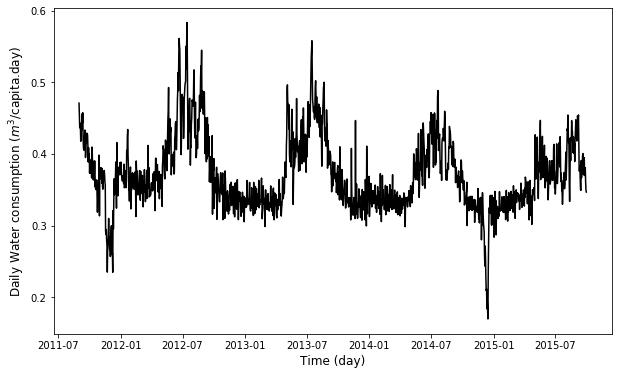

In [7]:
# Define a function to draw time_series plot
def timeseries (x_axis, y_axis, x_label, y_label):
    plt.figure(figsize = (10, 6))
    plt.plot(x_axis, y_axis, color ='black')
    plt.xlabel(x_label, {'fontsize': 12})
    plt.ylabel(y_label, {'fontsize': 12})
    #plt.savefig('C:/Users/nious/Documents/Medium/LSTM&GRU/1.jpg', format='jpg', dpi=1000)

timeseries(df.index, df['WC (m3/capita.day)'], 'Time (day)', 
           'Daily Water consumption ($m^3$/capita.day)')


C:\Users\nious\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\nious\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


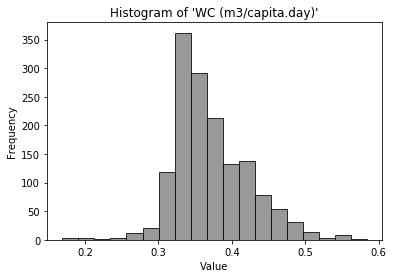

In [8]:
def plot_histogram(x):
    plt.hist(x, bins = 19, alpha=0.8, color = 'gray', edgecolor = 'black')
    plt.title("Histogram of '{var_name}'".format(var_name=x.name))
    plt.xlabel("Value")
    plt.ylabel("Frequency")

plot_histogram(df['WC (m3/capita.day)'])

# Data pre-processing

## Rename columns
I rename column names for the sake of simplicity. 

In [9]:
df = df.rename(columns = {'Max Temp (C)':'Max_T', 'Min Temp (C)':'Min_T', 
                          'Total Precip (mm)':'T_P','WC (m3/capita.day)':'UWC'})
df

,Max_T,Min_T,T_P,UWC
Date,,,,
2011-09-01,25.8,14.1,0.0,0.471092
2011-09-02,26.9,19.7,0.0,0.455604
2011-09-03,29.5,21.1,0.0,0.436626
2011-09-04,27.8,19.2,15.0,0.442867
2011-09-05,21.5,14.6,11.0,0.437708
...,...,...,...,...
2015-09-26,18.0,5.6,0.0,0.377468
2015-09-27,23.1,5.2,0.0,0.380783
2015-09-28,21.4,13.0,0.6,0.361291


## Handle missing values
When it comes to time-series data, it is a good idea to use linear interpolation to replace missing values.

In [10]:
# Check missing values
df.isnull().sum()

Max_T    27
Min_T    20
T_P      54
UWC       1
dtype: int64

In [11]:
# Replace missing values by interpolation
def replace_missing (attribute):
    return attribute.interpolate(inplace=True)

replace_missing(df['Max_T'])
replace_missing(df['Min_T'])
replace_missing(df['T_P'])
replace_missing(df['UWC'])

## Replace outliers
I use statistical methods to detect outliers. The statistical methods assume a normal distribution of data points. Therefore, values in a low probability region are considered as outliers. 

I apply the concept of maximum likelihood in the statistical methods meaning that values outside the range of
μ±2σ are labelled as an outlier. Note that μ±2σ contains 95% of data
under the assumption of normal distribution.

In [12]:
# Outlier detection
up_b = df['UWC'].mean() + 2*df['UWC'].std()
low_b = df['UWC'].mean() - 2*df['UWC'].std()

# Replace outlier by interpolation for base consumption
df.loc[df['UWC'] > up_b, 'UWC'] = np.nan
df.loc[df['UWC'] < low_b, 'UWC'] = np.nan
df['UWC'].interpolate(inplace=True)

## Split the dataset into train and test data
In this project, I set the first 80% of data as train data and the remaining 20% as test data. I train the model with train data and validate its performance with test data.

Dimension of train data:  (1192, 4)
Dimension of test data:  (299, 4)


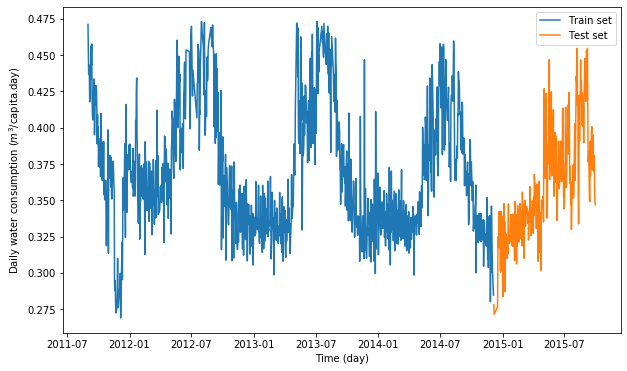

In [13]:
train_size = int(len(df)*0.8)
train_dataset, test_dataset = df.iloc[:train_size], df.iloc[train_size:]

# Plot train and test data
plt.figure(figsize = (10, 6))
plt.plot(train_dataset.UWC)
plt.plot(test_dataset.UWC)
plt.xlabel('Time (day)')
plt.ylabel('Daily water consumption ($m^3$/capita.day)')
plt.legend(['Train set', 'Test set'], loc='upper right')
#plt.savefig('C:/Users/nious/Documents/Medium/LSTM&GRU/2.jpg', format='jpg', dpi=1000)

print('Dimension of train data: ',train_dataset.shape)
print('Dimension of test data: ', test_dataset.shape)


## Split the target variable and dependent variables
UWC is the target variable (output) and is a function of dependent variables (input); Max_T, Min_T and T_P.

In [14]:
# Split train data to X and y
X_train = train_dataset.drop('UWC', axis = 1)
y_train = train_dataset.loc[:,['UWC']]

# Split test data to X and y
X_test = test_dataset.drop('UWC', axis = 1)
y_test = test_dataset.loc[:,['UWC']]

## Data transformation 
A good rule of thumb is that normalized data lead to better performance in Neural Networks. In this project, I use **MinMaxScaler** from sklearn. 

I define different scalers for input and output as they have different shapes. This is especially important for using inverse transform function.

* X_train.shape:  (1192, 3)
* y_train.shape:  (1192, 1)
* X_test.shape:  (299, 3)
* y_test.shape:  (299, 1)

It is important to ensure that the scale of the output variable is in the range 0-1  to match the scale of the activation function (tanh) on the output layer of LSTM, GRU and BiLSTM. Also, input variables are better to be small values, probably in the range of 0-1.

What are the steps?
- Fit the scaler using available training data (It means that the minimum and maximum observable values are estimated using training data.) 

- Apply the scaler to training data 

- Apply the scaler to test data

It is important to note that we should scale the unseen data with the scaler fitted on the training data.

In [15]:
# Transform X_train, y_train, X_test and y_test

# Different scaler for input and output
scaler_x = MinMaxScaler(feature_range = (0,1))
scaler_y = MinMaxScaler(feature_range = (0,1))

# Fit the scaler using available training data
input_scaler = scaler_x.fit(X_train)
output_scaler = scaler_y.fit(y_train)

# Apply the scaler to training data
train_y_norm = output_scaler.transform(y_train)
train_x_norm = input_scaler.transform(X_train)

# Apply the scaler to test data
test_y_norm = output_scaler.transform(y_test)
test_x_norm = input_scaler.transform(X_test)

## Create a 3D Input Dataset
LSTM, GRU and BiLSTM take a 3D input (num_samples, num_timesteps, num_features). So, I create a helper function, *create_dataset*, to reshape input.

In this project, I define time_steps = 30. It means that the model makes predictions based on the last 30-day data (In the first iteration of the for-loop, the input carries the first 30 days and the output is UWC on the 30th day).

In [16]:
def create_dataset (X, y, time_steps = 1):
    Xs, ys = [], []
    
    for i in range(len(X)-time_steps):
        v = X[i:i+time_steps, :]
        Xs.append(v)
        ys.append(y[i+time_steps])
        
    return np.array(Xs), np.array(ys)


TIME_STEPS = 30

X_test, y_test = create_dataset(test_x_norm, test_y_norm, TIME_STEPS)
X_train, y_train = create_dataset(train_x_norm, train_y_norm, TIME_STEPS)
print('X_train.shape: ', X_test.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape) 
print('y_test.shape: ', y_train.shape)

X_train.shape:  (269, 30, 3)
y_train.shape:  (1162, 1)
X_test.shape:  (269, 30, 3)
y_test.shape:  (1162, 1)


# Create BiLSTM, LSTM and GRU model
The first function, create_model_bilstm, creates a BDLSM and gets the number of units (neurons) in hidden layers. The second function, *create_model*, gets two inputs; number of units in hidden layers and model name (LSTM or GRU).

For the sake of simplicity, BiLSTM, LSTM and GRU have 2 hidden layers including 64 neurons and 1 neuron in the output layer.

To make the LSTM and GRU networks robust to changes, the Dropout function is used. Dropout(0.2)  randomly drops 20% of units from the network.

In [17]:
# Create BiLSTM model
def create_model_bilstm(units):
    model = Sequential()
    # First layer of BiLSTM
    model.add(Bidirectional(LSTM(units = units, return_sequences=True), 
                            input_shape=(X_train.shape[1], X_train.shape[2])))
    # Second layer of BiLSTM
    model.add(Bidirectional(LSTM(units = units)))
    model.add(Dense(1))
    #Compile model
    model.compile(loss='mse', optimizer='adam')
    return model


# Create LSTM or GRU model
def create_model(units, m):
    model = Sequential()
    # First layer of LSTM
    model.add(m (units = units, return_sequences = True, 
                 input_shape = [X_train.shape[1], X_train.shape[2]]))
    model.add(Dropout(0.2)) 
    # Second layer of LSTM
    model.add(m (units = units))                 
    model.add(Dropout(0.2))
    model.add(Dense(units = 1)) 
    #Compile model
    model.compile(loss='mse', optimizer='adam')
    return model


# BiLSTM
model_bilstm = create_model_bilstm(64)

# GRU and LSTM 
model_gru = create_model(64, GRU)
model_lstm = create_model(64, LSTM)

## Fit the models
I train the model with train data for 100 epoch and batch_size = 32. I get the model to use 20% of train data as validation data. It is important to set shuffle = False because the order of the data matters in our project.

To avoid overfitting, I set an early stop to stop training when "val_loss" has not improved after 10 epochs (patience = 10).


In [18]:
# Fit BiLSTM, LSTM and GRU
def fit_model(model):
    early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                               patience = 10)

    # shuffle = False because the order of the data matters
    history = model.fit(X_train, y_train, epochs = 100, validation_split = 0.2,
                    batch_size = 32, shuffle = False, callbacks = [early_stop])
    return history

history_bilstm = fit_model(model_bilstm)
history_lstm = fit_model(model_lstm)
history_gru = fit_model(model_gru)

Train on 929 samples, validate on 233 samples
Epoch 1/100
929/929 [==============================] - 4s 5ms/sample - loss: 0.0538 - val_loss: 0.0624
Epoch 2/100
929/929 [==============================] - 1s 672us/sample - loss: 0.0361 - val_loss: 0.0246
Epoch 3/100
929/929 [==============================] - 1s 659us/sample - loss: 0.0371 - val_loss: 0.0230
Epoch 4/100
929/929 [==============================] - 1s 669us/sample - loss: 0.0387 - val_loss: 0.0228
Epoch 5/100
929/929 [==============================] - 1s 665us/sample - loss: 0.0379 - val_loss: 0.0229
Epoch 6/100
929/929 [==============================] - 1s 646us/sample - loss: 0.0366 - val_loss: 0.0223
Epoch 7/100
929/929 [==============================] - 1s 786us/sample - loss: 0.0360 - val_loss: 0.0221
Epoch 8/100
929/929 [==============================] - 1s 660us/sample - loss: 0.0355 - val_loss: 0.0234
Epoch 9/100
929/929 [==============================] - 1s 660us/sample - loss: 0.0341 - val_loss: 0.0247
Epoch 10/10

### Plot train loss vs validation loss 

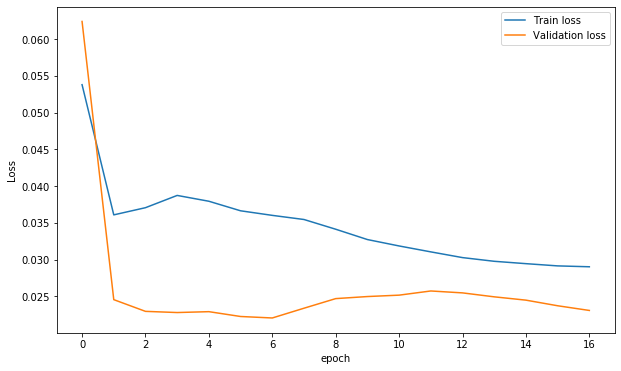

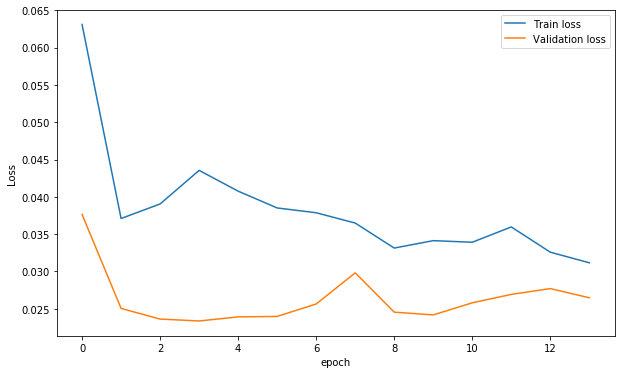

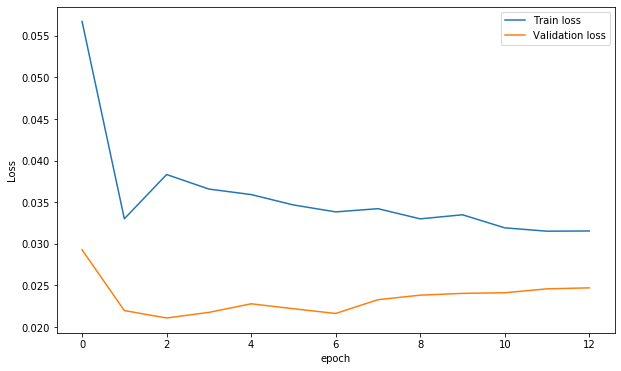

In [19]:
def plot_loss (history, model_name):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Train vs Validation Loss for ' + model_name)
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
    #plt.savefig('C:/Users/nious/Documents/Medium/LSTM&GRU/loss_'+model_name+'.jpg', format='jpg', dpi=1000)

plot_loss (history_bilstm, 'BiLSTM')
plot_loss (history_lstm, 'LSTM')
plot_loss (history_gru, 'GRU')

## Inverse target variable for train and test data
After building the model, I have to transform the target variable back to original data space for train and test data using scaler_y.inverse_transform.

In [20]:
# Note that I have to use scaler_y
y_test = scaler_y.inverse_transform(y_test)
y_train = scaler_y.inverse_transform(y_train)

# Make prediction using BiLSTM, LSTM and GRU
Here I predict UWC using BiLSTM, LSTM and GRU models. Then, I plot true future vs prediction the three models.

In [21]:
def prediction(model):
    prediction = model.predict(X_test)
    prediction = scaler_y.inverse_transform(prediction)
    return prediction

prediction_bilstm = prediction(model_bilstm)
prediction_lstm = prediction(model_lstm)
prediction_gru = prediction(model_gru)


## Plot true future vs prediction

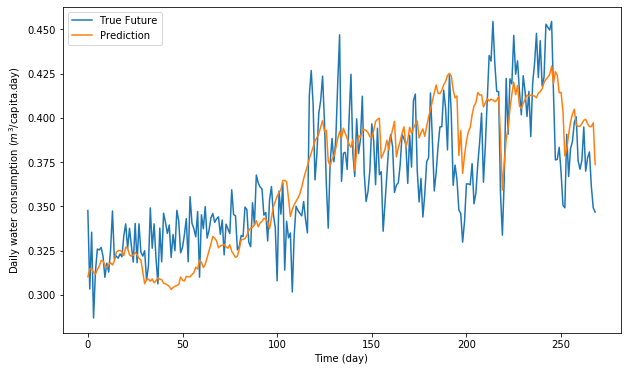

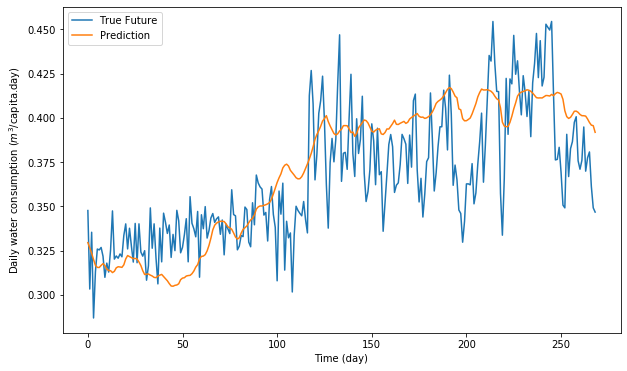

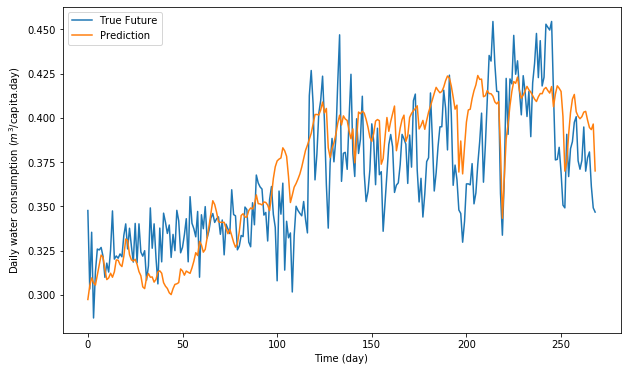

In [22]:
def plot_future(prediction, model_name, y_test):
    
    plt.figure(figsize=(10, 6))
    
    range_future = len(prediction)

    plt.plot(np.arange(range_future), np.array(y_test), label='True Future')
    plt.plot(np.arange(range_future), np.array(prediction),label='Prediction')

    plt.title('True future vs prediction for ' + model_name)
    plt.legend(loc='upper left')
    plt.xlabel('Time (day)')
    plt.ylabel('Daily water consumption ($m^3$/capita.day)')
    #plt.savefig('C:/Users/nious/Documents/Medium/LSTM&GRU/predic_'+model_name+'.jpg', format='jpg', dpi=1000)
    
    
plot_future(prediction_bilstm, 'BiLSTM', y_test)
plot_future(prediction_lstm, 'LSTM', y_test)
plot_future(prediction_gru, 'GRU', y_test)

## Calculate RMSE and MAE

In [23]:
# Define a function to calculate MAE and RMSE
def evaluate_prediction(predictions, actual, model_name):
    errors = predictions - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()

    print(model_name + ':')
    print('Mean Absolute Error: {:.4f}'.format(mae))
    print('Root Mean Square Error: {:.4f}'.format(rmse))
    print('')


evaluate_prediction(prediction_bilstm, y_test, 'Bidirectional LSTM')
evaluate_prediction(prediction_lstm, y_test, 'LSTM')
evaluate_prediction(prediction_gru, y_test, 'GRU')


Bidirectional LSTM:
Mean Absolute Error: 0.0196
Root Mean Square Error: 0.0241

LSTM:
Mean Absolute Error: 0.0217
Root Mean Square Error: 0.0269

GRU:
Mean Absolute Error: 0.0208
Root Mean Square Error: 0.0257



Results show that the **LSTM** has the best performance compared to BiLSTM and GRU. So I use LSTM model to forecast water consumption in the next 10 years. 

# Forecast water consumption in 10 years
I import climate data projections and filter them for the period of 2015-01-01 to 2025-01-01.

In [24]:
# Import climate data projection
newinput = pd.read_csv('Climate Projection.csv', parse_dates=['Date'], index_col = 'Date')

# Order of the variable are important
X_new = newinput.loc['2015-01-01':'2025-01-01',:] 
X_new

,Max_T,Min_T,T_P
Date,,,
2015-01-01,0.277555,-8.716697,13.182100
2015-01-02,-3.914390,-14.399488,0.097887
2015-01-03,-6.322045,-14.075309,15.170749
2015-01-04,-6.649641,-14.971584,0.721021
2015-01-05,-7.567964,-14.486991,0.314032
...,...,...,...
2024-12-28,-4.463168,-8.274184,1.820822
2024-12-29,-5.153296,-10.554352,0.738211
2024-12-30,-4.472976,-10.539899,6.611651


In [25]:
# Plot histoy and future data
def plot_history_future(y_train, prediction, model_name):
    
    plt.figure(figsize=(10, 6))
    
    range_history = len(y_train)
    range_future = list(range(range_history, range_history + len(prediction)))

    plt.plot(np.arange(range_history), np.array(y_train), label='History')
    plt.plot(range_future, np.array(prediction),label='Prediction')

    plt.title('History and prediction for ' + model_name)
    plt.legend(loc='upper right')
    plt.xlabel('Time (day)')
    plt.ylabel('Daily water consumption ($m^3$/capita.day)')
    #plt.savefig('C:/Users/nious/Documents/Medium/LSTM&GRU/3.jpg', format='jpg', dpi=1000)


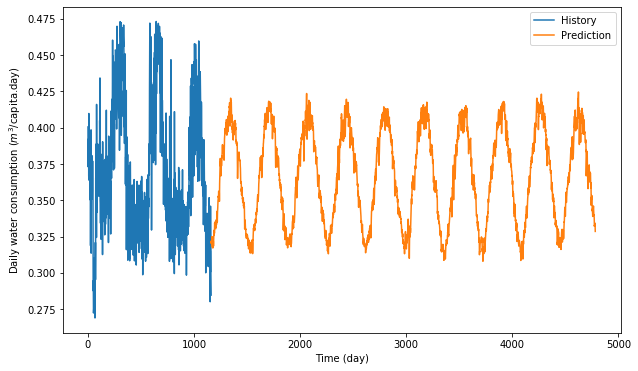

In [26]:
def forecast(X_input, time_steps):
    # Scale the unseen input with the scaler fitted on the training data
    X = input_scaler.transform(X_input)
    # Reshape unseen data to a 3D input
    Xs = []
    for i in range(len(X) - time_steps):
        v = X[i:i+time_steps, :]
        Xs.append(v)
        
    X_transformed = np.array(Xs)

    # Make prediction for unseen data using LSTM model 
    prediction = model_bilstm.predict(X_transformed)
    prediction_actual = scaler_y.inverse_transform(prediction)
    return prediction_actual


prediction = forecast(X_new, TIME_STEPS)
plot_history_future(y_train, prediction,'BiLSTM')